In [1]:
import pandas as pd
import numpy as np
from scipy import stats as stats

try:
    from tabulate import tabulate
except NameError:
    pass

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('./data/data.csv', sep = ';').dropna().set_index(['Grupo', 'i'])

In [3]:
def gen_descriptive_stats(data, name):
    if len(data.shape) == 1: # it's pd.Series
        data = data.to_frame()
    descriptive_stats = data.describe().T
    descriptive_stats['amplitude'] = descriptive_stats['max'] - descriptive_stats['min']
    for measure in data.columns:
        descriptive_stats.loc[measure, 'mode'] = data[measure].mode()[0]
        descriptive_stats.loc[measure, 'trim_mean 80%'] = stats.trim_mean(data[measure], 0.1)
        descriptive_stats.loc[measure, 'median'] = data[measure].median()
        descriptive_stats.loc[measure, 'variance'] = data[measure].var()
        descriptive_stats.loc[measure, 'variation coeff'] = stats.variation(data[measure])
        descriptive_stats.loc[measure, 'interquartile'] = stats.iqr(data[measure])
        descriptive_stats.loc[measure, 'skewness'] = data[measure].skew()
        descriptive_stats.loc[measure, 'kurtosis'] = data[measure].kurtosis()
    try:
        descriptive_stats_file = open(f'./tables/{name}_descriptive_stats.txt', 'w')
        descriptive_stats_file.write(tabulate(descriptive_stats, descriptive_stats.T.columns, tablefmt='latex'))
        descriptive_stats_file.close()
        np.savetxt(f"./tables/{name}_descriptive_stats_np.txt", descriptive_stats.to_numpy(), delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')
    except NameError:
        np.savetxt(f"./tables/{name}_descriptive_stats_np.txt", descriptive_stats.T.to_numpy(), delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')
    return descriptive_stats.T

### If we group all the diameters measures

In [4]:
diam = data['d1'].append(data['d2']).append(data['d3']).append(data['d4']).reset_index(drop = True)
gen_descriptive_stats(diam, 'Diameter')

,0
count,120.000000
mean,21.714083
std,1.751403
min,16.400000
25%,20.900000
50%,21.710000
75%,23.000000
max,24.640000
amplitude,8.240000
mode,23.000000


## Estudando dados qualitativos

In [5]:
qualitative = pd.read_csv('./data/qualitative_data.csv', sep = ';').set_index(['Grupo', 'i'])

In [6]:
qualitative['Não conformidade'] = qualitative.apply(lambda row: True if row.sum()>4 else False, axis = 1)

In [7]:
nao_conformidade = qualitative.replace(1,"X").fillna("").reset_index()

In [8]:
qualitative.columns

Index(['Oval', 'Achatada', 'Bicuda', 'Disforme', 'Assimetrica', 'Curva',
       'Chanfrada', 'CurtaLonga', 'Não Plano', 'Grande Abertura',
       'Não conformidade'],
      dtype='object')

In [9]:
defeitos_forma = ['Oval', 'Achatada', 'Bicuda', 'Disforme', 'Não Plano']
defeitos_presilha = ['Assimetrica', 'Curva', 'Chanfrada', 'CurtaLonga', 'Grande Abertura']

In [10]:
qualitative['Defeitos de forma'] = qualitative[defeitos_forma].sum(axis = 1)
qualitative['Defeitos de presilha'] = qualitative[defeitos_presilha].sum(axis = 1)
qualitative['Total de defeitos'] = qualitative['Defeitos de presilha'] + qualitative['Defeitos de forma']

In [11]:
nao_conformidade = qualitative[['Defeitos de forma', 'Defeitos de presilha', 'Total de defeitos', 'Não conformidade']].reset_index()

In [12]:
nao_conformidade_file = open('./tables/table.txt', 'w')
nao_conformidade_file.write(tabulate(table, table.columns, tablefmt='latex'))
nao_conformidade_file.close()
# np.savetxt("./tables/nao_conformidade_np.txt", nao_conformidade.T.to_numpy(), delimiter=' & ', newline=' \\\\\n')

NameError: name 'table' is not defined

In [16]:
nao_conformidade

,Grupo,i,Defeitos de forma,Defeitos de presilha,Total de defeitos,Não conformidade
0,2,1,2.0,4.0,6.0,True
1,2,2,2.0,3.0,5.0,True
2,2,3,4.0,4.0,8.0,True
3,2,4,2.0,4.0,6.0,True
4,2,5,2.0,4.0,6.0,True
5,2,6,2.0,3.0,5.0,True
6,2,7,2.0,2.0,4.0,False
7,2,8,2.0,1.0,3.0,False
8,2,9,2.0,2.0,4.0,False
9,2,10,2.0,2.0,4.0,False


In [13]:
table = nao_conformidade.groupby(['Grupo']).sum().drop(columns = ['i'])

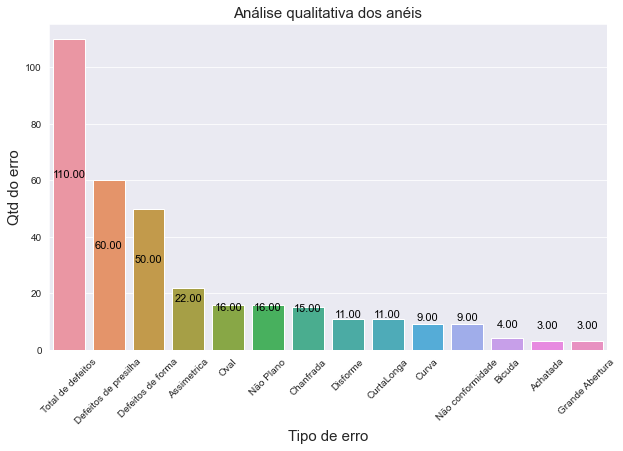

In [14]:
plt.figure(figsize = (10,6))
sns.set_style("darkgrid")
ax = sns.barplot(x='index', y=0, data=qualitative.sum().to_frame().reset_index().sort_values([0], ascending = False))
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Tipo de erro', fontsize=15)
ax.set_ylabel('Qtd do erro', fontsize=15)
ax.set_title('Análise qualitativa dos anéis', fontsize=15)

for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()/2),
                 ha='center', va='center', fontsize=11, color='k', xytext=(0, 20),
                 textcoords='offset points')
        
plt.savefig('./figures/tipo_erros.png', dpi=500)

In [9]:
contingencia = qualitative.groupby(['Grupo']).sum()
try:
    contingencia_file = open('contingencia.txt', 'w')
    contingencia_file.write(tabulate(contingencia.T, contingencia.T.columns, tablefmt='latex'))
    contingencia_file.close()
    np.savetxt("./tables/contingencia_np.txt", contingencia.T.to_numpy(), delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')
except NameError:
    np.savetxt("./tables/contingencia_np.txt", contingencia.T.to_numpy(), delimiter=' & ', fmt='%2.2e', newline=' \\\\\n')

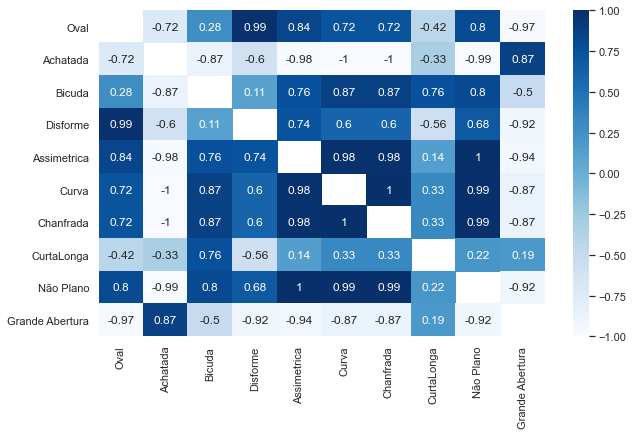

In [10]:
corr_contingencia = contingencia.corr()
for i in range(corr_contingencia.shape[0]):
    corr_contingencia.iloc[i,i] = None

plt.figure(figsize = (10,6))
sns.set(style = 'white')
ax = sns.heatmap(corr_contingencia, cmap = "Blues", annot = True)
plt.savefig('./figures/corr_contingencia.png', dpi=500)

## Diagramas de pontos e de ramos e folhas

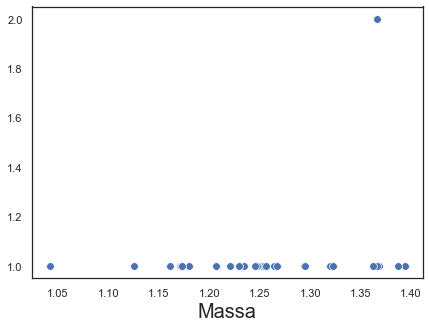

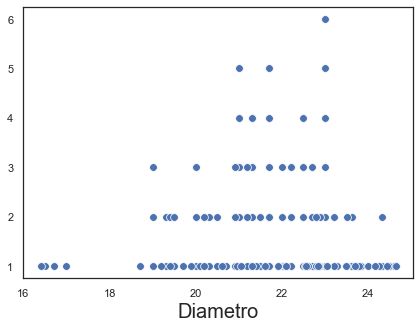

In [11]:
massa = data['m'].to_frame()
diam = data['d1'].append(data['d2']).append(data['d3']).append(data['d4']).reset_index(drop = True)
diam = diam.to_frame()
diam.columns = ['diam']

dummy = []

for index, qtd in enumerate(massa['m']):
    subset = massa.iloc[:index + 1]  # Create subset starting at the beginning of dataset until the movie itself
    count = len(subset[subset['m'] == qtd])  # Count all movies from the same year in this subset
    dummy.append(count)  # Appended counts will be used as vertical values in the scatterplot,
    # which will help to create a dot plot

# Data for the plot
x = massa['m']
y = dummy

# Dot plot created using scatter plot
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(x, y, s=60, legend="full", palette="RdYlGn")
plt.xlabel("Massa", size=20)
plt.savefig('./figures/dotplot_massa.png', dpi=500)
plt.show()


dummy = []

for index, qtd in enumerate(diam['diam']):
    subset = diam.iloc[:index + 1]  # Create subset starting at the beginning of dataset until the movie itself
    count = len(subset[subset['diam'] == qtd])  # Count all movies from the same year in this subset
    dummy.append(count)  # Appended counts will be used as vertical values in the scatterplot,
    # which will help to create a dot plot

# Data for the plot
x = diam['diam']
y = dummy

# Dot plot created using scatter plot
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(x, y, s=60, legend="full", palette="RdYlGn")
plt.xlabel("Diametro", size=20)
plt.savefig('./figures/dotplot_diametro.png', dpi=500)
plt.show()

## Boxplots de massa e diametro de novo

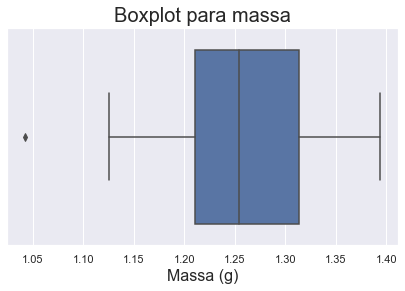

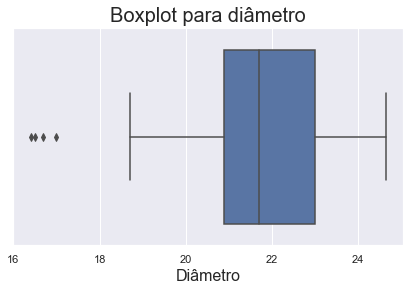

In [12]:
plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")

ax = sns.boxplot(x = massa['m'])
ax.set_title('Boxplot para massa', fontsize = 20)
ax.set_xlabel('Massa (g)', fontsize = 16)
plt.savefig('./figures/boxplot_massa.png', dpi=500)

plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")

ax = sns.boxplot(x = diam['diam'])
ax.set_title('Boxplot para diâmetro', fontsize = 20)
ax.set_xlabel('Diâmetro', fontsize = 16)
plt.savefig('./figures/boxplot_diametro.png', dpi=500)

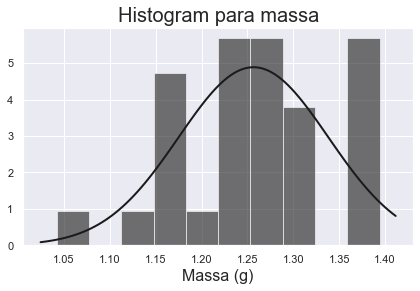

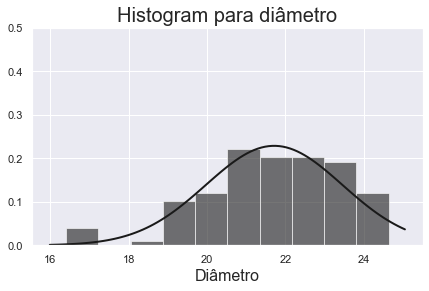

In [13]:
plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")

# plt.hist(scaled_df['diam'], histtype = 'stepfilled')
plt.hist(massa['m'], bins=10, density=True, alpha=0.6, color = 'k')
# Plot the PDF.
xmin, xmax = plt.xlim()
# plt.ylim(top=0.5)
x = np.linspace(xmin, xmax, 100)
mu, std = stats.norm.fit(massa['m'])
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)



plt.title('Histogram para massa', fontsize = 20)
plt.xlabel('Massa (g)', fontsize = 16)
plt.savefig('./figures/hist_massa.png', dpi=500)
plt.show()

plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")


# plt.hist(scaled_df['diam'], histtype = 'stepfilled')
plt.hist(diam['diam'], bins=10, density=True, alpha=0.6, color = 'k')
# Plot the PDF.
xmin, xmax = plt.xlim()
plt.ylim(top=0.5)
x = np.linspace(xmin, xmax, 100)
mu, std = stats.norm.fit(diam)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


plt.title('Histogram para diâmetro', fontsize = 20)
plt.xlabel('Diâmetro', fontsize = 16)
plt.savefig('./figures/hist_diametro.png', dpi=500)
plt.show()

In [14]:
def mean_confidence_interval(data, confidence=0.95):
#     print(data)
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return [m, m-h, m+h]

In [15]:
ci_massa = (sorted(mean_confidence_interval(massa['m'].values)))
ci_diam = sorted(mean_confidence_interval(diam['diam'].values))
np.savetxt("./tables/ci_massa.txt", ci_massa, delimiter=' & ', fmt='%2.4e', newline=' \\\\\n')
np.savetxt("./tables/ci_diam.txt", ci_diam, delimiter=' & ', fmt='%2.4e', newline=' \\\\\n')

## Hypothesis testing

In [16]:
# This is a two-sided test for testing if the sample mean is significantly different from one given mean
tset, pval = stats.ttest_1samp(diam, 20)
print('P-valor para diâmetro: '+"{0:.10%}".format(pval[0]))

P-valor para diâmetro: 0.0000000000%


In [89]:
diam.drop(columns = ['const']).to_csv('./data/diam.csv', index = False)

## Diagrama de dispersão

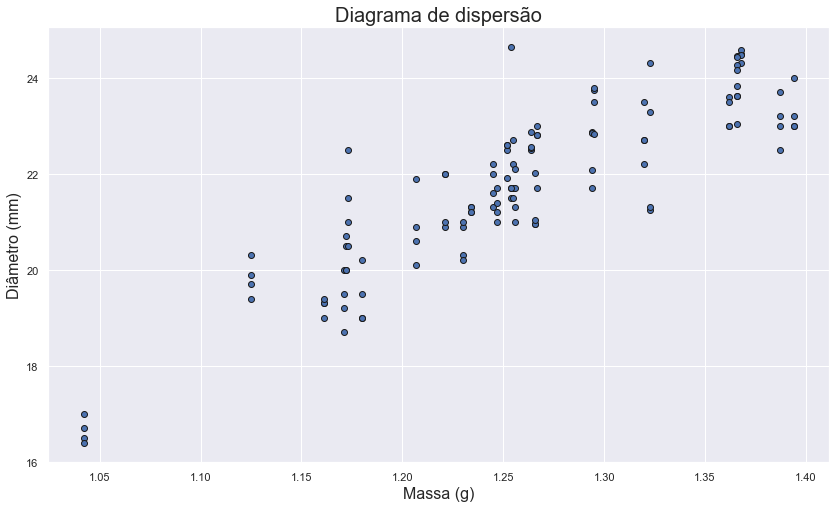

In [44]:
plt.figure(figsize=(14, 8))
sns.set_style("darkgrid")

plt.scatter(massa['m'],data['d1'], color = 'b', linewidths = 1, edgecolors = 'k')
plt.scatter(massa['m'],data['d2'], color = 'b', linewidths = 1, edgecolors = 'k')
plt.scatter(massa['m'],data['d3'], color = 'b', linewidths = 1, edgecolors = 'k')
plt.scatter(massa['m'],data['d4'], color = 'b', linewidths = 1, edgecolors = 'k')

plt.title('Diagrama de dispersão', fontsize = 20)
plt.xlabel('Massa (g)', fontsize = 16)
plt.ylabel('Diâmetro (mm)', fontsize = 16)
plt.savefig('./figures/diag_dispersao.png', dpi=500)
plt.show()

In [118]:
import statsmodels.api as sm

In [119]:
mod = sm.OLS(diam, massa_concat)

In [120]:
lr = mod.fit()

In [121]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   diam   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     411.5
Date:                Sun, 03 May 2020   Prob (F-statistic):           2.84e-40
Time:                        13:51:49   Log-Likelihood:                -146.95
No. Observations:                 120   AIC:                             297.9
Df Residuals:                     118   BIC:                             303.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
m             18.8330      0.928     20.285      0.000      16.994      20.672
beta          -1.9508      1.169     -1.669      0.098      -4.266       0.364
==============================================================================
Omnibus:                        4.426   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                3.904
Skew:                           0.348   Prob(JB):                        0.142
Kurtosis:                       3.545   Cond. No.                         31.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
lr.rsquared

0.7771330505065785

In [123]:
print(lr.params)
lr.conf_int(0.05)

m       18.832997
beta    -1.950832
dtype: float64


,0,1
m,16.994434,20.671559
beta,-4.265980,0.364315


In [134]:
massa_concat.drop(columns = ['beta']).merge(diam, right_index = True, left_index = True, how = 'inner').cov()

,m,diam
m,0.006721,0.126575
diam,0.126575,3.067413


In [135]:
massa_concat.drop(columns = ['beta']).merge(diam, right_index = True, left_index = True, how = 'inner').corr()

,m,diam
m,1.000000,0.881552
diam,0.881552,1.000000


## Teste de hipótese da correlação

In [150]:
massa_concat = massa_concat.drop(columns = ['beta'])

In [156]:
diam['diam'].values

array([20.  , 17.  , 19.3 , 21.7 , 19.  , 20.  , 21.  , 23.  , 23.  ,
       22.7 , 20.96, 21.7 , 22.5 , 23.28, 22.5 , 24.32, 21.71, 23.74,
       24.46, 23.63, 21.7 , 23.6 , 22.  , 21.  , 21.3 , 21.3 , 19.7 ,
       23.  , 20.1 , 20.3 , 19.5 , 16.7 , 19.3 , 22.2 , 20.2 , 20.  ,
       21.5 , 23.  , 23.2 , 23.5 , 22.02, 22.88, 22.54, 21.25, 22.61,
       24.5 , 21.49, 23.49, 24.26, 23.84, 21.  , 23.  , 20.9 , 21.7 ,
       21.2 , 22.  , 20.3 , 21.7 , 21.9 , 20.9 , 18.7 , 16.5 , 19.  ,
       22.7 , 19.  , 20.7 , 22.5 , 24.  , 22.5 , 22.2 , 20.95, 22.85,
       22.88, 24.32, 22.6 , 24.59, 21.71, 23.79, 24.17, 23.63, 21.3 ,
       23.5 , 21.  , 21.4 , 21.3 , 22.2 , 19.4 , 22.8 , 20.9 , 21.  ,
       19.2 , 16.4 , 19.4 , 21.5 , 19.5 , 20.5 , 20.5 , 23.2 , 23.7 ,
       22.7 , 21.04, 22.07, 22.57, 21.31, 21.91, 24.48, 24.64, 22.83,
       24.43, 23.04, 22.1 , 23.  , 22.  , 21.2 , 21.2 , 21.6 , 19.9 ,
       22.8 , 20.6 , 20.2 ])

In [158]:
stats.pearsonr(massa_concat['m'].values, diam['diam'].values)

(0.8815515019025143, 2.8411478313867494e-40)

## Questão o

In [164]:
df_o = data.reset_index().drop(columns = ['i'])
df_o.head(2)

,Grupo,m,d1,d2,d3,d4
0,2.0,1.171,20.0,19.5,18.7,19.2
1,2.0,1.042,17.0,16.7,16.5,16.4


In [166]:
# df_o.loc[df_o['Grupo'] == 2]
df_o['Grupo'].unique()

array([2., 3., 1.])

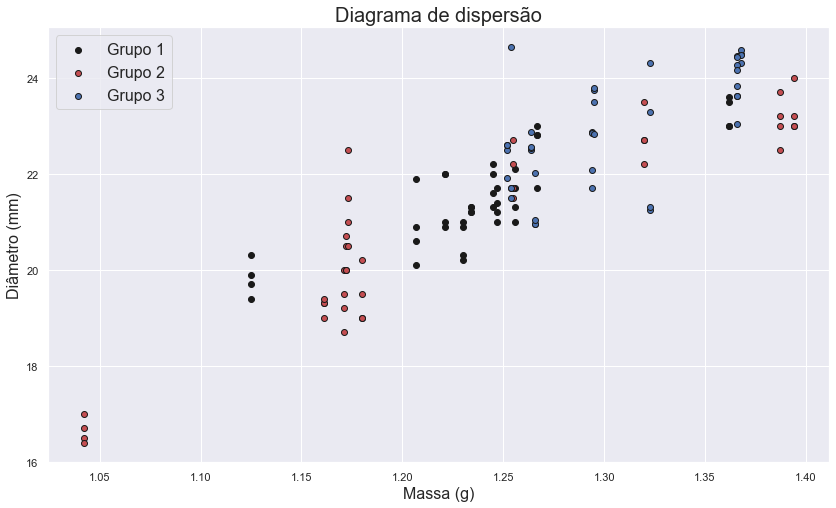

In [171]:
plt.figure(figsize=(14, 8))
sns.set_style("darkgrid")

dict_color = {
    1:'k',
    2:'r',
    3:'b'
}

for grupo in [1,2,3]:
    df_grupo = df_o.loc[df_o['Grupo'] == grupo]
    plt.scatter(df_grupo['m'],df_grupo['d1'], color = dict_color[grupo], linewidths = 1, edgecolors = 'k')
    plt.scatter(df_grupo['m'],df_grupo['d2'], color = dict_color[grupo], linewidths = 1, edgecolors = 'k')
    plt.scatter(df_grupo['m'],df_grupo['d3'], color = dict_color[grupo], linewidths = 1, edgecolors = 'k')
    plt.scatter(df_grupo['m'],df_grupo['d4'], color = dict_color[grupo], linewidths = 1, edgecolors = 'k', label = f'Grupo {grupo}')

plt.title('Diagrama de dispersão', fontsize = 20)
plt.xlabel('Massa (g)', fontsize = 16)
plt.ylabel('Diâmetro (mm)', fontsize = 16)
plt.legend(fontsize = 16)
plt.savefig('./figures/diag_dispersao_grupo.png', dpi=500)
plt.show()

## Questão p - boxplot por grupo

In [178]:
grupo_concat = df_o['Grupo'].append(df_o['Grupo']).append(df_o['Grupo']).append(df_o['Grupo']).reset_index(drop = True).to_frame()

In [179]:
df_grupos = grupo_concat.merge(massa_concat, right_index = True, left_index = True, how = 'inner').merge(diam, right_index = True, left_index = True, how = 'inner')

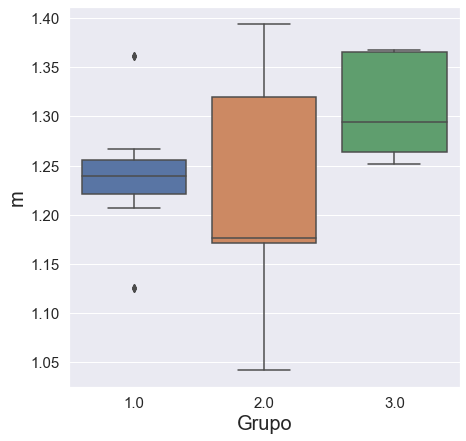

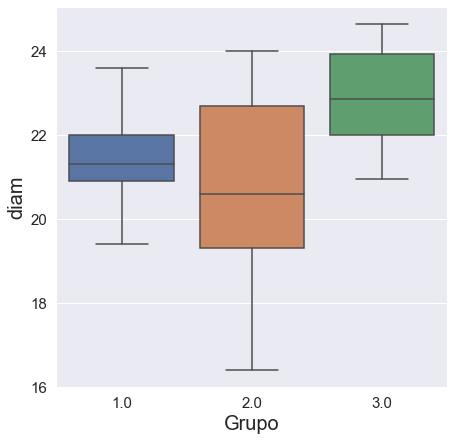

In [189]:
for medida in ['m', 'diam']:
    plt.figure(figsize=(7, 7))
    sns.set(style="darkgrid")
    ax = sns.boxplot(x="Grupo", y=medida, data=df_grupos)
    ax.set_xlabel("Grupo",fontsize=20)
    ax.set_ylabel(medida,fontsize=20)
    ax.tick_params(labelsize=15)
    plt.savefig(f'./figures/boxplot_{medida}.png', dpi=500)

## ANOVA

In [195]:
t_stats, pvalues_m = stats.f_oneway(df_grupos.loc[df_grupos['Grupo'] == 1]['m'], df_grupos.loc[df_grupos['Grupo'] == 2]['m'], df_grupos.loc[df_grupos['Grupo'] == 3]['m'])
t_stats, pvalues_d = stats.f_oneway(df_grupos.loc[df_grupos['Grupo'] == 1]['diam'], df_grupos.loc[df_grupos['Grupo'] == 2]['diam'], df_grupos.loc[df_grupos['Grupo'] == 3]['diam'])

In [196]:
pvalues_m

9.50351684689372e-06

In [197]:
pvalues_d

8.337575858040511e-09

In [204]:
stats.levene(df_grupos.loc[df_grupos['Grupo'] == 1]['m'], df_grupos.loc[df_grupos['Grupo'] == 2]['m'], df_grupos.loc[df_grupos['Grupo'] == 3]['m'])

LeveneResult(statistic=8.132709058587446, pvalue=0.0004930615516829977)